In [19]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle
import textwrap

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);

np.seterr(divide = 'ignore');


In [2]:
crossval_infrates = cvc.CrossValidation(
                                ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv',
                                ExternalObservableInfo = {'Country':'Country','Observable':'Growth rate','Date':'Date','date_offset':0,'Cases':'Confirmed','readcsv':{'sep':';'},'dropna':['R']},
                                resolve_US_states = True,
                                FinalDateFromDB = True,
                                FinalDateExtendWithShiftdays = True)

crossval_rt = cvc.CrossValidation(
                                ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv',
                                ExternalObservableInfo = {'Country':'Country','Observable':'R','Date':'Date','date_offset':0,'Cases':'Confirmed','readcsv':{'sep':';'},'dropna':['R']},
                                resolve_US_states = True,
                                FinalDateFromDB = True,
                                FinalDateExtendWithShiftdays = True)

In [3]:
shiftdaylist  = np.arange(6)*5
alphalist     = np.power(10,np.linspace(-4,-1,num = 7))
crossvalcount = 10


crossval_infrates.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_rt.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)


  0 0.000100        16:30:22
  0 0.000316        16:30:52
  0 0.001000        16:31:14
  0 0.003162        16:31:25
  0 0.010000        16:31:33
  0 0.031623        16:31:40
  0 0.100000        16:31:47
  5 0.000100        16:32:41
  5 0.000316        16:33:14
  5 0.001000        16:33:37
  5 0.003162        16:33:50
  5 0.010000        16:33:59
  5 0.031623        16:34:08
  5 0.100000        16:34:15
 10 0.000100        16:35:19
 10 0.000316        16:35:59
 10 0.001000        16:36:21
 10 0.003162        16:36:37
 10 0.010000        16:36:49
 10 0.031623        16:36:57
 10 0.100000        16:37:03
 15 0.000100        16:38:00
 15 0.000316        16:38:39
 15 0.001000        16:38:58
 15 0.003162        16:39:09
 15 0.010000        16:39:18
 15 0.031623        16:39:25
 15 0.100000        16:39:31
 20 0.000100        16:40:30
 20 0.000316        16:41:04
 20 0.001000        16:41:20
 20 0.003162        16:41:32
 20 0.010000        16:41:42
 20 0.031623        16:41:49
 20 0.100000  

In [20]:
crossval_infrates = pickle.load(open('pickle/cv_infrates_200527.csv','rb'))
crossval_rt = pickle.load(open('pickle/cv_rt_200527.csv','rb'))


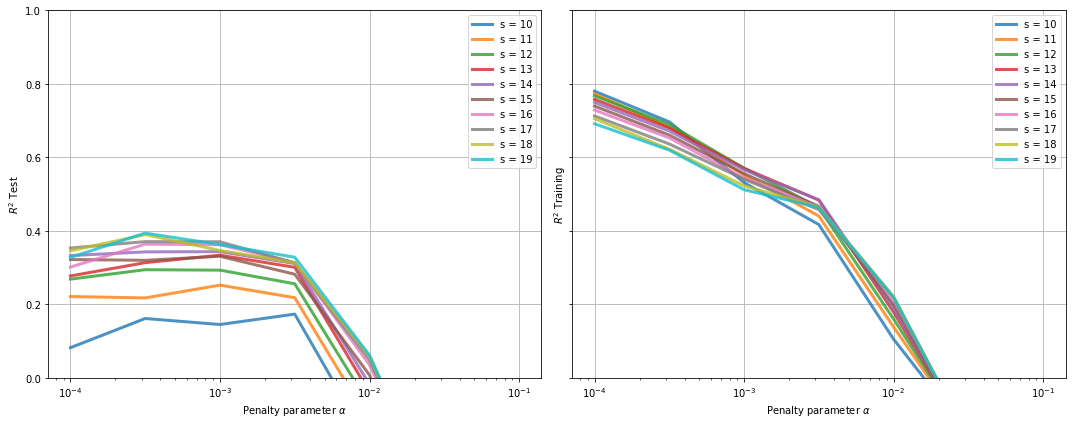

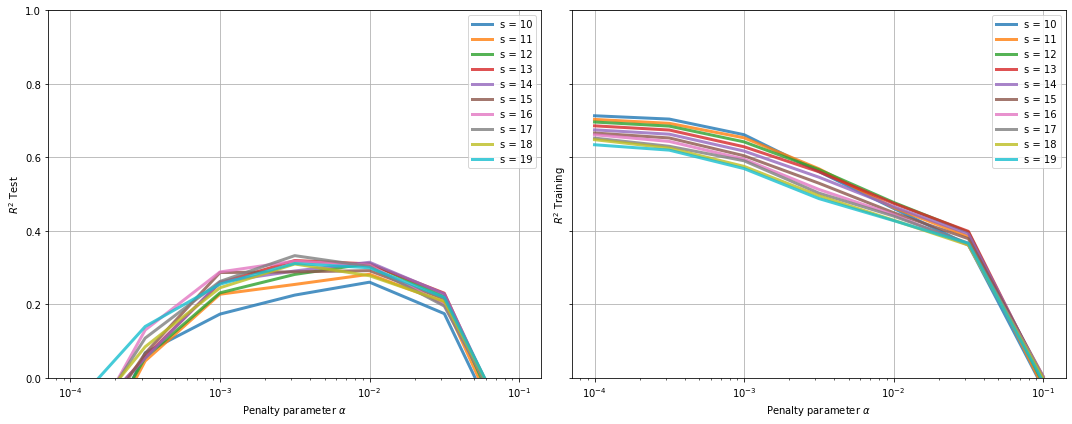

In [23]:
crossval_infrates.PlotCVresults()
crossval_rt.PlotCVresults()

In [25]:
crossval_infrates.ProcessCVresults().sort_values('R2 Test Weighted', ascending=False).head(10)

,shiftdays,alpha,Loglike Test Avgd,Loglike Test Avgd Std,Loglike Training Avgd,Loglike Training Avgd Std,R2 Test Avgd,R2 Test Avgd Std,R2 Training Avgd,R2 Training Avgd Std,RSS Training Sum,RSS Test Sum,NVar Training Sum,NVar Test Sum,Test Sample Size,Training Sample Size,RSS per datapoint Training,RSS per datapoint Test,R2 Training Weighted,R2 Test Weighted
69,19,0.000316,73.292421,30.127836,5392.319040,33.014601,-0.120419,1.533139,0.619912,0.004377,561.184609,10.362937,1476.500628,17.108117,3369,245937,0.002282,0.003076,0.619923,0.394268
62,18,0.000316,73.016899,30.139426,5305.650613,32.480792,-0.268613,2.371890,0.622544,0.004889,552.273190,10.274735,1463.196416,16.849376,3315,241995,0.002282,0.003099,0.622557,0.390201
55,17,0.000316,70.516655,31.085765,5266.437421,35.119977,-0.317609,2.279857,0.636569,0.005344,526.892770,10.432173,1449.790938,16.585319,3260,237980,0.002214,0.003200,0.636573,0.371000
51,17,0.001000,71.172024,30.616373,4890.198967,38.538161,-0.171286,1.976724,0.540748,0.006953,665.794910,10.438674,1449.790938,16.585319,3260,237980,0.002798,0.003202,0.540765,0.370608
48,16,0.000316,69.775423,31.675186,5239.538041,38.495754,-0.404024,2.625849,0.653307,0.005042,498.088824,10.379162,1436.744575,16.321008,3205,233965,0.002129,0.003238,0.653321,0.364061
65,19,0.001000,71.179517,27.348405,4977.674451,27.916381,-0.047575,1.262344,0.512189,0.006322,720.242811,10.900451,1476.500628,17.108117,3369,245937,0.002929,0.003236,0.512196,0.362849
44,16,0.001000,69.402609,31.215834,4804.852571,30.514873,-0.194232,1.969489,0.543608,0.005258,655.713695,10.403858,1436.744575,16.321008,3205,233965,0.002803,0.003246,0.543612,0.362548
52,17,0.000100,69.834923,31.024248,5646.057954,38.330132,-0.324066,2.068629,0.712981,0.005242,416.124542,10.720741,1449.790938,16.585319,3260,237980,0.001749,0.003289,0.712976,0.353601
58,18,0.001000,70.567909,29.573470,4921.994188,36.661858,-0.160264,1.728681,0.522718,0.006496,698.354260,11.004487,1463.196416,16.849376,3315,241995,0.002886,0.003320,0.522720,0.346891
59,18,0.000100,70.711643,30.637033,5711.078063,34.222707,-0.372311,2.342847,0.705417,0.005319,431.023659,11.018706,1463.196416,16.849376,3315,241995,0.001781,0.003324,0.705423,0.346047


In [26]:
crossval_rt.ProcessCVresults().sort_values('R2 Test Weighted', ascending = False).head(10)

,shiftdays,alpha,Loglike Test Avgd,Loglike Test Avgd Std,Loglike Training Avgd,Loglike Training Avgd Std,R2 Test Avgd,R2 Test Avgd Std,R2 Training Avgd,R2 Training Avgd Std,RSS Training Sum,RSS Test Sum,NVar Training Sum,NVar Test Sum,Test Sample Size,Training Sample Size,RSS per datapoint Training,RSS per datapoint Test,R2 Training Weighted,R2 Test Weighted
54,17,0.003162,-20.622564,19.720834,-1726.295421,29.494122,0.043777,0.832355,0.503032,0.006347,40773.472070,639.290885,82043.786697,958.241972,3260,237980,0.171332,0.196101,0.503028,0.332850
26,13,0.003162,-18.941753,20.005488,-1475.093164,24.278319,0.007148,1.049415,0.561169,0.005149,34753.375872,619.453790,79196.713766,910.469184,3036,221628,0.156810,0.204036,0.561177,0.319632
47,16,0.003162,-20.780080,19.515443,-1679.768770,32.934386,0.044828,0.796444,0.513001,0.008036,39648.703747,646.116355,81414.287944,947.307433,3205,233965,0.169464,0.201596,0.513001,0.317944
29,14,0.010000,-19.978784,19.565681,-1789.687986,24.292608,0.084756,0.769242,0.465978,0.004922,42728.743811,633.014023,80013.308232,923.852506,3094,225862,0.189181,0.204594,0.465980,0.314811
15,12,0.010000,-19.038716,19.246086,-1715.468543,25.554633,-0.008362,1.164738,0.477618,0.005878,40928.800476,617.072644,78350.556129,896.540138,2978,217394,0.188270,0.207210,0.477620,0.311718
68,19,0.003162,-22.301412,19.524854,-1804.361486,29.118988,-0.015240,0.980734,0.488090,0.007650,42655.748582,675.376808,83329.469802,980.946700,3369,245937,0.173442,0.200468,0.488107,0.311505
22,13,0.010000,-19.657317,19.447511,-1743.443624,26.388189,0.058194,0.859452,0.475050,0.005377,41574.861864,627.905109,79196.713766,910.469184,3036,221628,0.187588,0.206820,0.475043,0.310350
61,18,0.003162,-22.214276,18.960769,-1764.337624,25.500416,-0.001865,0.896383,0.495852,0.006129,41686.729354,668.814806,82689.872391,969.536654,3315,241995,0.172263,0.201754,0.495867,0.310171
43,16,0.010000,-21.296386,19.482684,-1888.806931,25.225049,0.082071,0.687066,0.444199,0.005324,45249.988446,656.654056,81414.287944,947.307433,3205,233965,0.193405,0.204884,0.444201,0.306821
50,17,0.010000,-22.051945,19.101443,-1917.153743,22.823533,0.051151,0.757598,0.440425,0.004122,45909.289194,667.471645,82043.786697,958.241972,3260,237980,0.192912,0.204746,0.440429,0.303441


In [27]:
crossval_infrates.ComputeFinalModels(modelparameters=[(17,10**-3.5)])
crossval_rt.ComputeFinalModels(modelparameters=[(17,10**-2.5)])

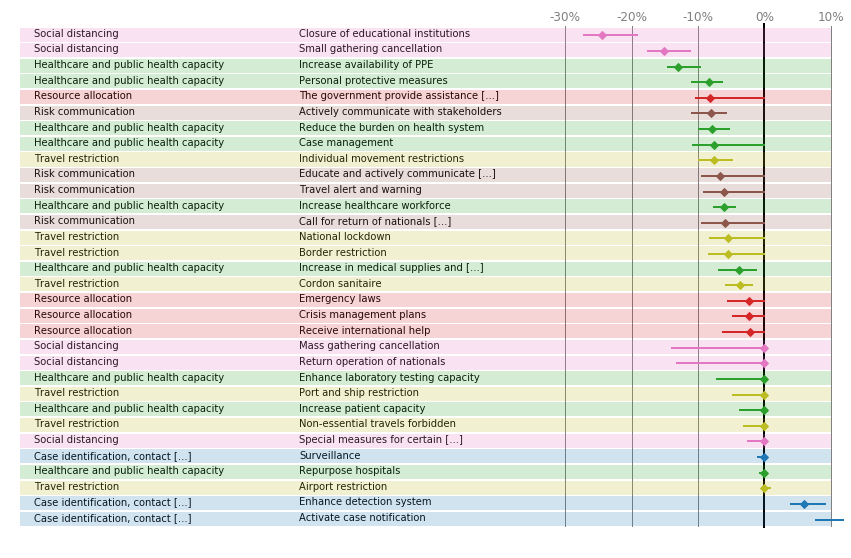

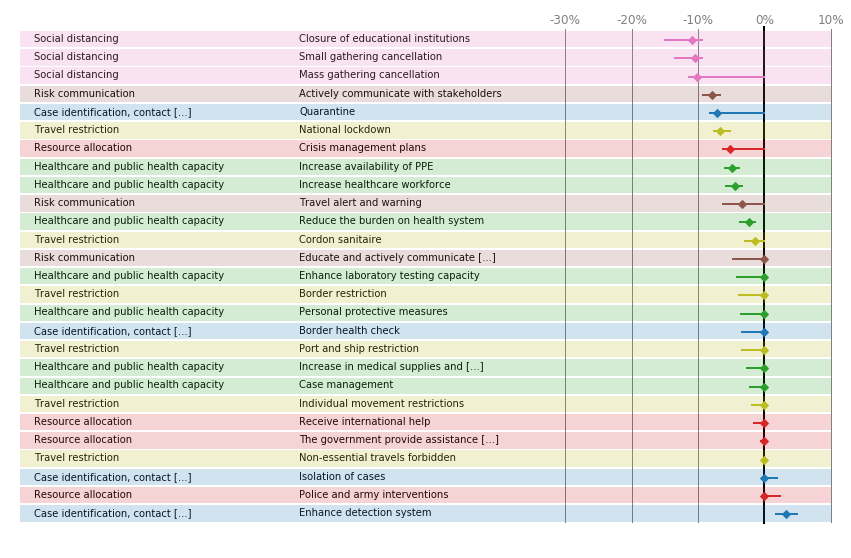

In [28]:
crossval_infrates.PlotMeasureListSorted(drop_zeros = True, figsize = (15,10))
crossval_rt.PlotMeasureListSorted(drop_zeros = True, figsize = (15,10))


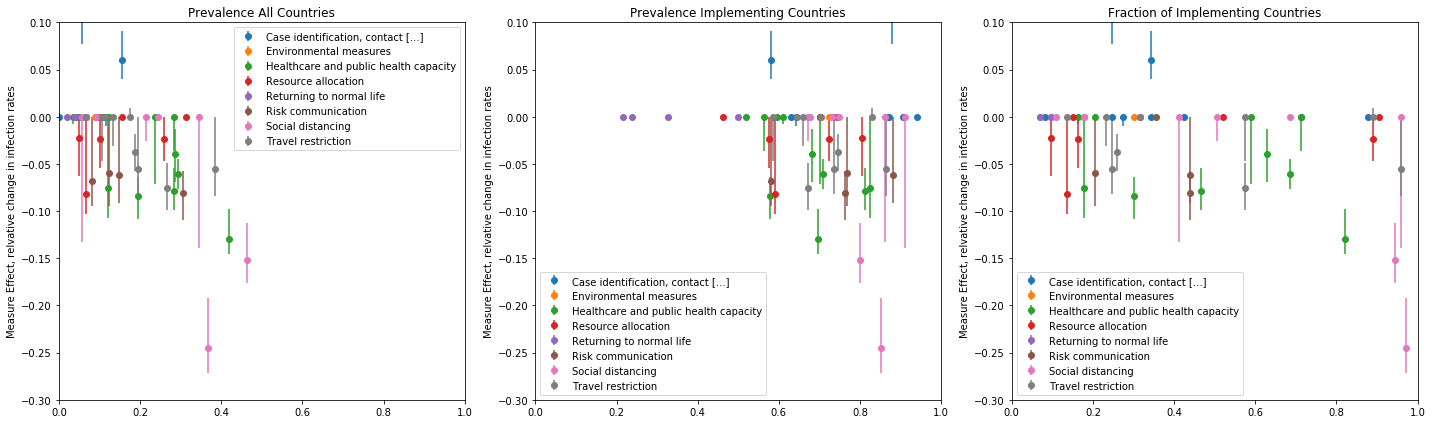

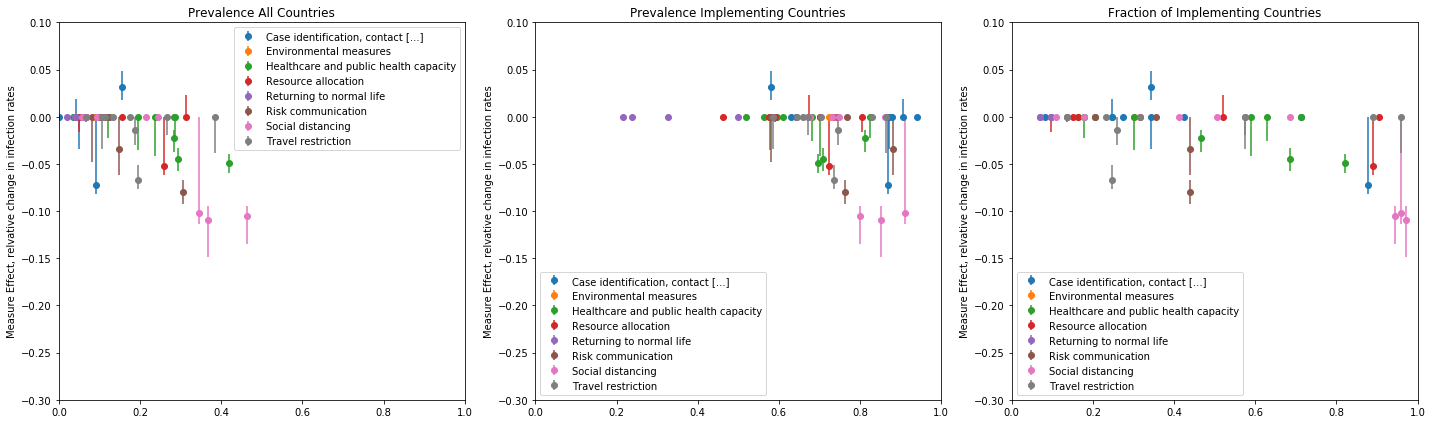

In [29]:
crossval_infrates.PlotPrevalenceEffects()
crossval_rt.PlotPrevalenceEffects()
